In [1]:
## Technical Assessment – Analyst, Data Science – 008272- Emma Luk

## Task_II

### ML DBSCAN Clustering

- Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is an unsupervised clustering algorithm which is based on the idea of clustering the points forming contiguous regions of high points density.

- These clusters are separated from other such clusters which are also contguous regions of high points density.

- It overcomes the problem of clustering even the loosely related observations of K Means.

- It also produces better results as compared to K Means for a variety of different distributions.

### Task I: Exploratory data analysis (EDA): 
- see Task_1_Exploratory-data-analysis-(EDA).ipynb
### Step 5: Ask a Question about the data¶¶
- see Task_1.ipynb
Try to answer a question I have about the data using a plot or statistic. What are the Firm_Name with the highest Gross Claims, pure net claims, Net expense ratio, High GWP, NWP, without loss?

- see gross claims, pure net claims, net expense ratio.pdf
- high SWP, NWP & net profit w figures.pdf
- Tableau Dashboard and saved it in pdf
- work-3-top.pdf
- work3-weakness.pdf
### Step 6: Resources¶
- see Task_1_Exploratory-data-analysis-(EDA).ipynb
- Python code
- pandas-profiling

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [97]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [98]:
# load the data into a pandas dataframe

df1 = pd.read_excel('average.xlsx', sheet_name='average')


In [99]:
df1

,Firm,GWP (£m),NWP (£m),Gross claims incurred (£m),Pure net claims ratio,Net expense ratio,SCR (£m),EoF for SCR (£m),SCR coverage ratio,Net combined ratio,Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity]
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,15.810911,4.855652,5.148679,2.483186,0.229962,63.010298,81.369071,6.169212e+00,0.596259,2652.283426,2815.021649,41.730253
321,Firm 322,1641.277935,2935.647964,107.450121,1.124050,0.924658,1258.474502,1221.750181,1.692352e+00,1.382454,5974.006170,5581.087596,2768.633500
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,8.863583,45.587888,1.955650e+01,0.000000,69.028907,26.987871,69.855025
323,Firm 324,101.384970,24.060966,4.994887,2.209822,0.332172,35.701622,49.416705,7.454092e-01,0.988765,406.938357,306.741281,46.221204


In [100]:
df1.columns

Index(['Firm', 'GWP (£m)', 'NWP (£m) ', 'Gross claims incurred (£m)',
       'Pure net claims ratio', 'Net expense ratio', 'SCR (£m)',
       'EoF for SCR (£m)', 'SCR coverage ratio', 'Net combined ratio',
       'Total assets (£m)', 'Total liabilities (£m)',
       'Excess of assets over liabilities (£m) [= equity]'],
      dtype='object')

In [101]:
df1.dtypes

Firm                                                  object
GWP (£m)                                             float64
NWP (£m)                                             float64
Gross claims incurred (£m)                           float64
Pure net claims ratio                                float64
Net expense ratio                                    float64
SCR (£m)                                             float64
EoF for SCR (£m)                                     float64
SCR coverage ratio                                   float64
Net combined ratio                                   float64
Total assets (£m)                                    float64
Total liabilities (£m)                               float64
Excess of assets over liabilities (£m) [= equity]    float64
dtype: object

In [102]:
df1 = df1.rename(columns={'GWP (£m)':'GWP_mean',
                          'NWP (£m) ':'NWP_mean',
                          'Gross claims incurred (£m)':'Gross_claims_incurred_mean',
                          'Pure net claims ratio':'Pure_net_claims_ratio_mean',
                          'Net expense ratio':'Net_expense_ratio_mean',
                          'SCR (£m)':'SCR_mean',
                          'EoF for SCR (£m)':'EoF_for_SCR_mean',
                          'SCR coverage ratio':'SCR_coverage_ratio_mean',
                          'Net combined ratio': 'Net_combined_ratio_mean',
                          'Total assets (£m)':'Total_assets_mean',
                          'Total liabilities (£m)':'Total_liabilities_mean',
                          'Excess of assets over liabilities (£m) [= equity]':'Excess_of_assets_over_liabilities_mean'})


In [103]:
df1

,Firm,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,15.810911,4.855652,5.148679,2.483186,0.229962,63.010298,81.369071,6.169212e+00,0.596259,2652.283426,2815.021649,41.730253
321,Firm 322,1641.277935,2935.647964,107.450121,1.124050,0.924658,1258.474502,1221.750181,1.692352e+00,1.382454,5974.006170,5581.087596,2768.633500
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,8.863583,45.587888,1.955650e+01,0.000000,69.028907,26.987871,69.855025
323,Firm 324,101.384970,24.060966,4.994887,2.209822,0.332172,35.701622,49.416705,7.454092e-01,0.988765,406.938357,306.741281,46.221204


In [79]:
#X_train = df1[['GWP_mean', 'NWP_mean', 'SCR_mean']]

In [104]:
X_train = df1[['GWP_mean', 'NWP_mean', 'Total_liabilities_mean']]

In [105]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [106]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
-1,188
0,133
1,4


In [ ]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('NWP_mean', 'GWP_mean',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=100)

sns.scatterplot('Total_liabilities_mean', 'GWP_mean',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=100)

axes[0].scatter(outliers['NWP_mean'], outliers['GWP_mean)'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Total_liabilities_mean'], outliers['GWP_mean'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

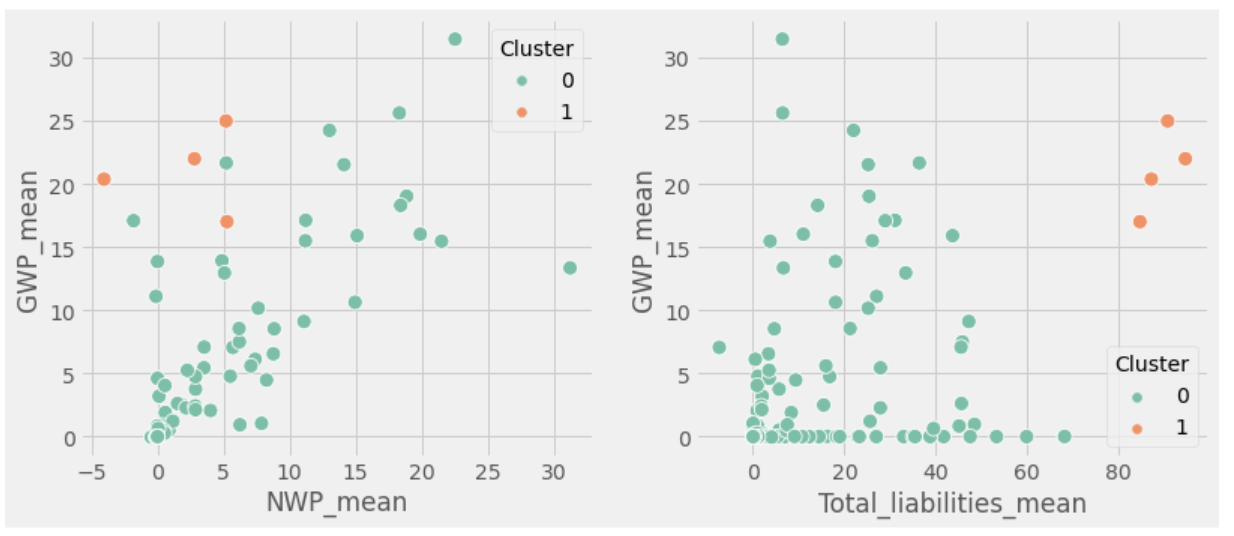